# ICD Project

## Importing libraries

In [343]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import contractions
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import pos_tag
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/dani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load Dataset

In [344]:
data = pd.read_csv('icd_scopus.csv')
data

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,NaN,NaN,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,NaN,NaN,NaN,NaN,...,978-981198484-6,NaN,NaN,English,Springer Proc. Bus. Econ.,Conference review,Final,NaN,Scopus,2-s2.0-85161683590
1,Vargas A.C.; Magnussen R.,"Vargas, Alejandra Celis (57951796800); Magnuss...",57951796800; 55579157200,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,2022-October,NaN,NaN,139,...,978-191458751-1,NaN,NaN,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,NaN,Scopus,2-s2.0-85141152410
2,Fiş Erümit S.; Karakuş Yılmaz T.,"Fiş Erümit, S. (36343307300); Karakuş Yılmaz, ...",36343307300; 24166942000,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",27,4,NaN,1039,...,NaN,ICMLF,NaN,English,Tech. Knowl. Learn.,Article,Final,NaN,Scopus,2-s2.0-85128920438
3,Alsamawi F.N.; Kurnaz S.,"Alsamawi, Farazdaq Nahedh (57224682003); Kurna...",57224682003; 57203640255,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),13,2,NaN,1135,...,NaN,NaN,NaN,English,Appl. Nanosci. (Switzerland),Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-85108164717
4,Karnalim O.; Simon; Chivers W.,"Karnalim, Oscar (57191242240); Simon (74097108...",57191242240; 7409710825; 6505969230,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,633 LNNS,NaN,NaN,910,...,978-303126875-5,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85151127571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Unkelos-Shpigel N.,"Unkelos-Shpigel, Naomi (55786671200)",55786671200,Peel the onion: Use of collaborative and gamif...,2016,Lecture Notes in Business Information Processing,249,NaN,NaN,122,...,978-331939563-0,NaN,NaN,English,Lect. Notes Bus. Inf. Process.,Conference paper,Final,NaN,Scopus,2-s2.0-84976621686
378,Chou C.C.; He S.-J.; Olsen J.,"Chou, Chientzu Candace (56900344000); He, Shi-...",56900344000; 57190391124; 57200244427,The impact of badges on course participation a...,2015,Workshop Proceedings of the 23rd International...,NaN,NaN,NaN,333,...,978-499080147-2,NaN,NaN,English,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",Conference paper,Final,NaN,Scopus,2-s2.0-85040455534
379,Zarzycki A.,"Zarzycki, Andrzej (33668016500)",33668016500,Teaching and Designing for Augmented Reality,2014,Proceedings of the International Conference on...,1,NaN,NaN,357,...,978-949120707-5,NaN,NaN,English,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,Conference paper,Final,NaN,Scopus,2-s2.0-85006776989
380,Arias Aranda D.; Bustinza Sánchez O.F.; Djundu...,"Arias Aranda, Daniel (7801374665); Bustinza Sá...",7801374665; 35791444600; 57016876400,Effects of gamified business simulations on en...,2016,Revista de Educacion,2016,371,NaN,126,...,NaN,NaN,NaN,English,Revista Educ.,Article,Final,NaN,Scopus,2-s2.0-84951275541


## Basic Text pre-processing

### Checking for duplicate values

In [345]:
data.duplicated().sum()

0

Zero duplicated values, so there's no need to try to remove them.

### Cheking for null values


In [346]:
# Checking for missing values
data.isna().sum()

Authors                           18
Author full names                 18
Author(s) ID                      18
Title                              0
Year                               0
Source title                       0
Volume                           103
Issue                            223
Art. No.                         296
Page start                       108
Page end                         112
Page count                        98
Cited by                           0
DOI                               74
Link                               0
Affiliations                      20
Authors with affiliations         20
Abstract                           0
Author Keywords                   41
Index Keywords                   150
Molecular Sequence Numbers       382
Chemicals/CAS                    378
Tradenames                       381
Manufacturers                    382
Funding Details                  278
Funding Texts                    280
References                        24
C

### Remove useless columns in the context and columns with NaN values

In [347]:
columns_to_drop = ['Author(s) ID', 'Author full names', 'Volume', 'Issue', 'Art. No.', 'Funding Details', 'Conference code', 'Conference location', 'Conference name', 'Conference date', 'Funding Texts', 'Editors', 'Open Access', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Sponsors', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISBN', 'CODEN', 'PubMed ID']

droped_data = data.drop(columns=columns_to_drop)
droped_data

,Authors,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,The proceedings contain 22 papers. The special...,NaN,NaN,NaN,NaN,Springer Nature,21987246,English,Springer Proc. Bus. Econ.,Conference review,Final,Scopus,2-s2.0-85161683590
1,Vargas A.C.; Magnussen R.,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,Open Data is defined as digital data that is m...,Education; Game-based learning; Open Data; Rea...,Iterative methods; Mapping; Students; Digital ...,"Atenas J., Havemann L., Priego E., Open Data a...",NaN,Dechema e.V.,20490992,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,Scopus,2-s2.0-85141152410
2,Fiş Erümit S.; Karakuş Yılmaz T.,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",The purpose of this study was to propose desig...,Game Mechanics and Dynamics; Gamification Desi...,Curricula; Game design; Motivation; Design ele...,"Baxter R.J., Holderness D.K., Wood D.A., Apply...",S. Fiş Erümit; Distance Education Application ...,Springer Science and Business Media B.V.,22111662,English,Tech. Knowl. Learn.,Article,Final,Scopus,2-s2.0-85128920438
3,Alsamawi F.N.; Kurnaz S.,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),The outbreak of COVID 19 has increased the anx...,Games; Gamification; Gamified learning system;...,Decision making; Developing countries; Human r...,"Adnan N., Nordin S.M., Rasli A.M., A possible ...",F.N. Alsamawi; Department of Electrical and Co...,Springer Science and Business Media Deutschlan...,21905509,English,Appl. Nanosci. (Switzerland),Article,Final,Scopus,2-s2.0-85108164717
4,Karnalim O.; Simon; Chivers W.,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,"When gamification is used in education, non-ga...",Academic integrity; Gamification; Non-game inc...,Education computing; Intellectual property; Ac...,"Infineon Technologies AG, AN2019-5 “PC and TC ...","O. Karnalim; University of Newcastle, Newcastl...",Springer Science and Business Media Deutschlan...,23673370,English,Lect. Notes Networks Syst.,Conference paper,Final,Scopus,2-s2.0-85151127571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Unkelos-Shpigel N.,Peel the onion: Use of collaborative and gamif...,2016,Lecture Notes in Business Information Processing,As software engineering and information system...,Collaboration; Education; Gamification,Curricula; Education; Education computing; Inf...,"Aberdour M., Achieving quality in open-source ...",N. Unkelos-Shpigel; Information Systems Depart...,Springer Verlag,18651348,English,Lect. Notes Bus. Inf. Process.,Conference paper,Final,Scopus,2-s2.0-84976621686
378,Chou C.C.; He S.-J.; Olsen J.,The impact of badges on course participation a...,2015,Workshop Proceedings of the 23rd International...,Badges have long been used to encourage users ...,Badges; Gamification; Interaction; Online lear...,Computer aided instruction; Computer games; Ed...,"Open Badges for Higher Education, (2013); Allr...",NaN,Asia-Pacific Society for Computers in Education,NaN,English,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",Conference paper,Final,Scopus,2-s2.0-85040455534
379,Zarzycki A.,Teaching and Designing for Augmented Reality,2014,Proceedings of the International Conference on...,This paper discusses ways emerging interactive...,AR; Augmented Reality; Gamification; Mobile Cu...,NaN,"KIM K, SEO B, HAN J, PARK J, Augmented Reality...",A. Zarzycki; New Jersey Institute of Technolog...,Education and research in Computer Aided Archi...,26841843,English,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,Conference paper,Fi

### Get duplicates abstract

In [348]:
duplicate = droped_data['Title'].duplicated().sum()
duplicate

6

In [349]:
# Remove duplicate rows
df = droped_data.drop_duplicates(subset=['Title'])
df.shape

(376, 17)

## **2. Preprocess the dataset**


### Clean up function

In [350]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Fix contractions
    final_string = ' '.join([contractions.fix(word) for word in stemmed_words])

    return final_string

In [351]:
#converts all the values in a specific columns of the DataFrame data to strings 
df["Title"] = df["Title"].astype(str) 

#Applying a Text Cleaning Function
df['cleanTitle'] = df['Title'].apply(clean_text)

/tmp/ipykernel_18671/2430915294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].astype(str)
/tmp/ipykernel_18671/2430915294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanTitle'] = df['Title'].apply(clean_text)


In [352]:
#... aims to create a new DataFrame called selected_columns that contains only the "Title" and "cleanTitle" columns from the original DataFrame df. Then, it displays the first 20 rows of this new DataFrame using the .head(20) method.
selected_columns = df[['Title', 'cleanTitle']]
selected_columns.head(20)

,Title,cleanTitle
0,International Conference on Applied Research i...,manag confer econom icarm research intern appli
1,A Game-based Approach for Open Data in Educati...,data systemat educ open gamebas approach map r...
2,Gamification Design in Education: What Might G...,sens give gamif might design learn play educ
3,A framework for adopting gamified learning sys...,adopt school smart system framework learn gamifi
4,Non-game Incentives in Gamified Programming Ed...,nongam prize mark incent gamifi educ program
5,Analysis of the college underachievers’ transf...,colleg underachiev via learn gamifi transform ...
6,How gamified cooperation and competition motiv...,cooper popular action competit onlin gamif pla...
7,A new gamification model for e-learning in Jor...,gamif elearn model jordan new higher educ
8,The Use of Immersive Tools in Higher Education...,room tool use escap immers higher educ
9,Systematic literature review about gamificatio...,mooc gamif systemat literatur review


/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


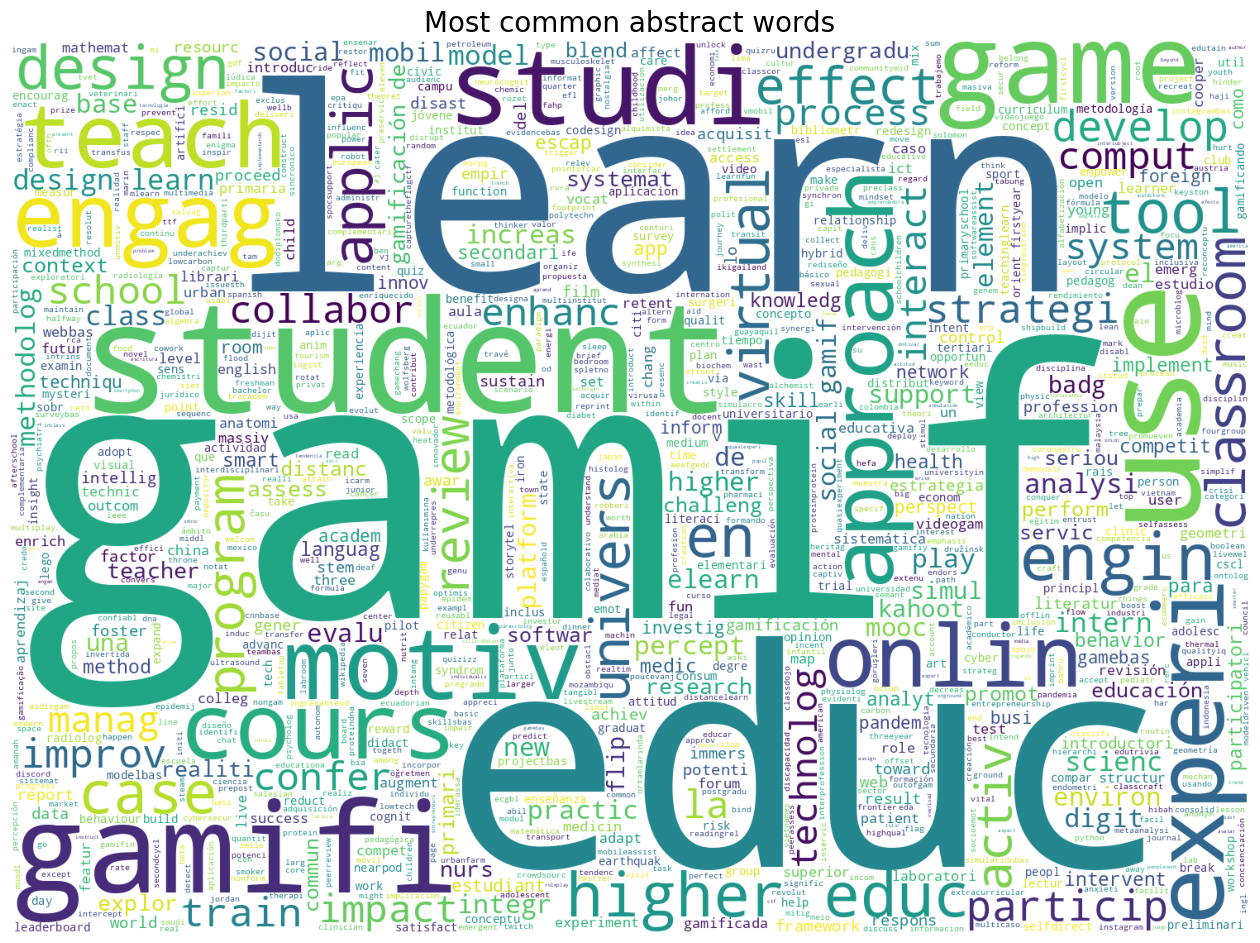

In [353]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(df["cleanTitle"]))
plt.title("Most common abstract words", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

## Representing text

### Bag-Of-Words ou 1 gram

In [354]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'cleanTitle' column
X = vectorizer.fit_transform(df['cleanTitle'])

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the resulting DataFrame
print(bow_df)


     abil  academ  academia  académico  accept  access  account  achiev  \
0       0       0         0          0       0       0        0       0   
1       0       0         0          0       0       0        0       0   
2       0       0         0          0       0       0        0       0   
3       0       0         0          0       0       0        0       0   
4       0       0         0          0       0       0        0       0   
..    ...     ...       ...        ...     ...     ...      ...     ...   
371     0       0         0          0       0       0        0       0   
372     0       0         0          0       0       0        0       0   
373     0       0         0          0       0       0        0       0   
374     0       0         0          0       0       0        0       0   
375     0       0         0          0       0       0        0       0   

     acquir  acquisit  ...  work  workshop  world  worth  write  young  youth  \
0         0       

### N-Grams

In [355]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleanTitle'])


n_grams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

                                               Authors  \
0                                                  NaN   
1                            Vargas A.C.; Magnussen R.   
2                     Fiş Erümit S.; Karakuş Yılmaz T.   
3                             Alsamawi F.N.; Kurnaz S.   
4                       Karnalim O.; Simon; Chivers W.   
..                                                 ...   
377                                 Unkelos-Shpigel N.   
378                      Chou C.C.; He S.-J.; Olsen J.   
379                                        Zarzycki A.   
380  Arias Aranda D.; Bustinza Sánchez O.F.; Djundu...   
381                                           Cronk R.   

                                                 Title  Year  \
0    International Conference on Applied Research i...  2023   
1    A Game-based Approach for Open Data in Educati...  2022   
2    Gamification Design in Education: What Might G...  2022   
3    A framework for adopting gamified learning

### Term Frequency-Inverse Document Frequency (TF-IDF)

In [356]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleanTitle'])

# Convert to array and then to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


     abil  academ  academia  académico  accept  access  account  achiev  \
0     0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
1     0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
2     0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
3     0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
4     0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
..    ...     ...       ...        ...     ...     ...      ...     ...   
371   0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
372   0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
373   0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
374   0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   
375   0.0     0.0       0.0        0.0     0.0     0.0      0.0     0.0   

     acquir  acquisit  ...  work  workshop  world  worth  write  young  youth  \
0       0.0       

## Part of Speech (POS) Tagging

In [357]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
df['POS_Tagged_Abstract'] = df['cleanTitle'].apply(pos_tag_sentence)

# Display the DataFrame
print(df[['cleanTitle', 'POS_Tagged_Abstract']].head())


                                          cleanTitle  \
0    manag confer econom icarm research intern appli   
1  data systemat educ open gamebas approach map r...   
2       sens give gamif might design learn play educ   
3   adopt school smart system framework learn gamifi   
4       nongam prize mark incent gamifi educ program   

                                 POS_Tagged_Abstract  
0  [(manag, NN), (confer, NN), (econom, JJ), (ica...  
1  [(data, NNS), (systemat, NNS), (educ, VBP), (o...  
2  [(sens, NNS), (give, VBP), (gamif, NN), (might...  
3  [(adopt, JJ), (school, NN), (smart, NN), (syst...  
4  [(nongam, JJ), (prize, NN), (mark, NN), (incen...  


/tmp/ipykernel_18671/95286773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS_Tagged_Abstract'] = df['cleanTitle'].apply(pos_tag_sentence)


In [358]:
document=df['Title']
document

0      International Conference on Applied Research i...
1      A Game-based Approach for Open Data in Educati...
2      Gamification Design in Education: What Might G...
3      A framework for adopting gamified learning sys...
4      Non-game Incentives in Gamified Programming Ed...
                             ...                        
377    Peel the onion: Use of collaborative and gamif...
378    The impact of badges on course participation a...
379         Teaching and Designing for Augmented Reality
380    Effects of gamified business simulations on en...
381    How can non-content related online games be us...
Name: Title, Length: 376, dtype: object

In [359]:
def preprocess_data(documents):
    # Define the list of stopwords in English
    stop_words = stopwords.words('english')
    
    # Tokenize the documents and remove stopwords
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in document]
    
    # Return the list of tokenized and preprocessed texts
    return texts


In [360]:
# Process the documents using the previously defined preprocessing function
processed_texts = preprocess_data(document)
processed_texts

[['international',
  'conference',
  'applied',
  'research',
  'management',
  'economics',
  'icarme'],
 ['game',
  'based',
  'approach',
  'open',
  'data',
  'education',
  'systematic',
  'mapping',
  'review'],
 ['gamification',
  'design',
  'education',
  'might',
  'give',
  'sense',
  'play',
  'learning'],
 ['framework',
  'adopting',
  'gamified',
  'learning',
  'systems',
  'smart',
  'schools',
  'covid'],
 ['non',
  'game',
  'incentives',
  'gamified',
  'programming',
  'education',
  'marks',
  'prizes'],
 ['analysis',
  'college',
  'underachievers',
  'transformation',
  'via',
  'gamified',
  'learning',
  'experience'],
 ['gamified',
  'cooperation',
  'competition',
  'motivate',
  'low',
  'carbon',
  'actions',
  'investigation',
  'gamification',
  'popular',
  'online',
  'payment',
  'platform',
  'china'],
 ['new', 'gamification', 'model', 'learning', 'jordan', 'higher', 'education'],
 ['use', 'immersive', 'tools', 'higher', 'education', 'escape', 'rooms'

In [361]:
# Create Dictionary
id2word = corpora.Dictionary(processed_texts)


In [362]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_texts]

In [363]:
# Set number of topics
num_topics = 20

In [364]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)


In [365]:
# Print the keywords for each topic
print(lda_model.print_topics())

[(0, '0.026*"gamification" + 0.019*"game" + 0.019*"learning" + 0.013*"students" + 0.013*"games" + 0.013*"flag" + 0.013*"using" + 0.013*"capture" + 0.013*"designing" + 0.013*"schools"'), (1, '0.079*"learning" + 0.038*"gamification" + 0.023*"education" + 0.015*"using" + 0.015*"process" + 0.011*"higher" + 0.011*"teaching" + 0.011*"application" + 0.011*"game" + 0.011*"educational"'), (2, '0.038*"gamification" + 0.031*"education" + 0.028*"gamified" + 0.024*"learning" + 0.022*"higher" + 0.017*"case" + 0.017*"study" + 0.017*"elements" + 0.017*"systematic" + 0.011*"review"'), (3, '0.060*"gamification" + 0.053*"learning" + 0.034*"students" + 0.021*"gamified" + 0.020*"courses" + 0.018*"engagement" + 0.018*"game" + 0.018*"use" + 0.017*"motivation" + 0.014*"based"'), (4, '0.040*"learning" + 0.025*"design" + 0.024*"gamified" + 0.017*"gamification" + 0.015*"engineering" + 0.014*"systems" + 0.011*"motivation" + 0.011*"improve" + 0.010*"based" + 0.010*"model"'), (5, '0.020*"gamification" + 0.017*"tech

In [366]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.4012410271314513


In [367]:

# Assuming 'processed_texts' is your list of tokenized and preprocessed documents
dictionary = Dictionary(processed_texts)


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.127489  0.082478       1        1  16.910888
19     0.170384  0.145693       2        1   7.599712
3     -0.115486  0.032493       3        1   6.298133
7     -0.063257  0.090018       4        1   6.279524
1     -0.056542 -0.002119       5        1   5.711377
9     -0.053184  0.005994       6        1   5.558645
13    -0.002432  0.043250       7        1   5.022503
15     0.083642  0.020514       8        1   4.517278
8     -0.066428 -0.052044       9        1   4.110670
18     0.036640  0.068033      10        1   4.078616
4      0.003031 -0.060589      11        1   4.065990
14    -0.018586 -0.094328      12        1   3.844514
17    -0.065758 -0.035915      13        1   3.743329
10    -0.052722 -0.018217      14        1   3.634626
2      0.026050 -0.001282      15        1   3.452268
5      0.007266  0.019349      16        1   3.436149
16     0.080524 -0.071343      17        1   3.281794
6      0.095935 -0.069693      18        1   2.834413
11     0.113705 -0.039542      19        1   2.810227
0      0.004708 -0.062749      20        1   2.809343, topic_info=             Term        Freq       Total Category  logprob  loglift
17   gamification  144.000000  144.000000  Default   30.000  30.0000
169            de   27.000000   27.000000  Default   29.000  29.0000
10      education   91.000000   91.000000  Default   28.000  28.0000
19       learning  103.000000  103.000000  Default   27.000  27.0000
53         higher   27.000000   27.000000  Default   26.000  26.0000
..            ...         ...         ...      ...      ...      ...
125      disaster    0.668093    3.634138  Topic20   -5.012   1.8785
130     reduction    0.668093    2.057590  Topic20   -5.012   2.4474
69     simulation    0.668093    6.737848  Topic20   -5.012   1.2612
131          risk    0.668093    2.099672  Topic20   -5.012   2.4271
645         group    0.668093    2.121409  Topic20   -5.012   2.4168

[1128 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1089     14  0.712038  academia
166       1  0.217802  academic
166       2  0.217802  academic
166       4  0.217802  academic
166      10  0.217802  academic
...     ...       ...       ...
201       7  0.354530      year
201      16  0.354530      year
454       7  0.683343     youth
924       4  0.670268  öğretmen
767      18  0.732931      času

[1655 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 20, 4, 8, 2, 10, 14, 16, 9, 19, 5, 15, 18, 11, 3, 6, 17, 7, 12, 1])